## Plotting contributions to $T_{\rm sys}(z)$

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import revelant packages
from FishLSS.headers import *
from FishLSS.twoPoint import *
from FishLSS.twoPointNoise import *

In [3]:
# Get default matplotlib color cycle, so that we can repeat colors easily in plots
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

## Tsys contributions

In [4]:
def Tsys(f, T_ampl=None, omt_coupling=None, sky_coupling=None, T_ground=None):
    # exp = fc["puma_32k_opt", "withnoise"]["exp"]
    Tsky = 25.0 * (f / 400.0) ** (-2.75) + 2.7
    Tscope = (
        T_ampl / omt_coupling / sky_coupling
        + T_ground * (1 - sky_coupling) / sky_coupling
    )
    return Tsky + Tscope

def Tsky(f):
    return 25.0 * (f / 400.0) ** (-2.75) + 2.7

def Tampl(exp, T_ampl, omt_coupling, sky_coupling):
    return exp.T_ampl / exp.omt_coupling / exp.sky_coupling

def Tground(exp, sky_coupling, T_ground):
    return exp.T_ground * (1 - exp.sky_coupling) / exp.sky_coupling

In [5]:
CV_omt_coupling = 0.9
CV_sky_coupling = 0.9
CV_T_ground = 300.0
CV_T_ampl = 50.0

## Plots

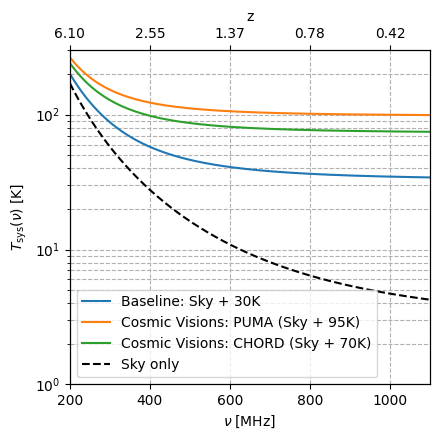

In [6]:
nu_chord = np.arange(300, 1500, 1)
nu_chord_extrap = np.arange(200, 300, 1)
nu_puma = np.arange(200, 1100, 1)

fig, ax = plt.subplots(figsize=(4.5, 4.5))


ax.plot(
    nu_puma, 
    Tsys(nu_puma, T_ampl=30, omt_coupling=1, sky_coupling=1, T_ground=0), 
    label="Baseline: Sky + 30K", 
    c=colors[0]
)

ax.plot(
    nu_puma, 
    Tsys(nu_puma, T_ampl=CV_T_ampl, omt_coupling=CV_omt_coupling, sky_coupling=CV_sky_coupling, T_ground=CV_T_ground), 
    label="Cosmic Visions: PUMA (Sky + 95K)", 
    c=colors[1]
)

ax.plot(
    nu_puma, 
    Tsys(nu_puma, T_ampl=30, omt_coupling=CV_omt_coupling, sky_coupling=CV_sky_coupling, T_ground=CV_T_ground), 
    label="Cosmic Visions: CHORD (Sky + 70K)", 
    c=colors[2]
)

ax.plot(nu_puma, Tsky(nu_puma), label="Sky only", ls='--', c='k')


ax.set_xlabel(r"$\nu\;[{\rm MHz}]$")
ax.set_ylabel(r"$T_{\rm sys}(\nu)\;[{\rm K}]$")
ax.grid(ls='--', which='both')
# plt.yticks(np.arange(0, 100, 10))
ax.set_ylim(1, 300)
ax.set_xlim(200, 1100)
ax.legend()
ax.set_yscale('log')


ax2 = ax.twiny()
ax2.set_xticks(ax.get_xticks())
ax2.set_xbound(ax.get_xbound())
upper_xticks = [
    ("%.2f" % (1420.4/f-1)) 
    for f in ax.get_xticks()
]
ax2.set_xticklabels(upper_xticks)
ax2.set_xlabel(r"z")


plt.tight_layout()
plt.savefig("../plots/paper/Tsys.pdf")